In [ ]:
!wget https://www.dropbox.com/s/rxg88n4s4t0bg6z/all-cryptocurrencies-price-20152021.zip


--2022-11-29 14:16:09--  https://www.dropbox.com/s/rxg88n4s4t0bg6z/all-cryptocurrencies-price-20152021.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/rxg88n4s4t0bg6z/all-cryptocurrencies-price-20152021.zip [following]
--2022-11-29 14:16:10--  https://www.dropbox.com/s/raw/rxg88n4s4t0bg6z/all-cryptocurrencies-price-20152021.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc01ce9dd8fa577b9f90d9262971.dl.dropboxusercontent.com/cd/0/inline/BxpGoRn0lNe_WEeYOMtvGk56Se5XhxcdDEkklglTeTvr8LhPCZeo9pvsfxEqSDvNrsPdxHCn_DqkIrpG_4nbuGAzZousBtSO3SzlYOmMSapHpkaGsCE2PhB-GIv4Mc0dOZnodQlouDCecQ3njhJcDFTkkJuiYIpTmOmMcMt2gRO77w/file# [following]
--2022-11-29 14:16:11--  https://uc01ce9dd8fa577b9f90d9262971.dl.dropboxusercontent.com/cd/0/inli

In [ ]:
!unzip all-cryptocurrencies-price-20152021.zip


Archive:  all-cryptocurrencies-price-20152021.zip
  inflating: BinanceCoin/BNB-USD.csv  
  inflating: Bitcoin/BTC-USD.csv     
  inflating: Cardano/ADA-USD.csv     
  inflating: Dogecoin/DOGE-USD.csv   
  inflating: Ethereum/ETH-USD.csv    
  inflating: HEX/HEX-USD.csv         
  inflating: Polkadot/DOT1-USD.csv   
  inflating: Solana/SOL1-USD.csv     
  inflating: Tether/USDT-USD.csv     
  inflating: USDCoin/USDC-USD.csv    
  inflating: XRP/XRP-USD.csv         


In [ ]:
import pandas as pd

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

In [ ]:
ethcoindf = pd.read_csv('Ethereum/ETH-USD.csv')
ethcoindf = ethcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [ ]:
usdcoindf = pd.read_csv('USDCoin/USDC-USD.csv')
usdcoindf = usdcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
usdcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2019-09-13,0.999028,1.006490,0.997497,0.998835,0.998835,159607257.0
1,2019-09-14,0.999584,1.004739,0.998116,0.999346,0.999346,146591060.0
2,2019-09-15,0.999346,1.006140,0.998562,1.003387,1.003387,108479017.0
3,2019-09-16,1.003133,1.010504,0.995350,0.999926,0.999926,303681510.0
4,2019-09-17,1.000015,1.006766,0.998124,1.003121,1.003121,171423477.0


# ETH

In [ ]:
closedf = ethcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2193, 2)


In [ ]:
closedf=closedf.dropna()

In [ ]:
#closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  2189


In [ ]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2189, 1)


In [ ]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1532, 1)
test_data:  (657, 1)


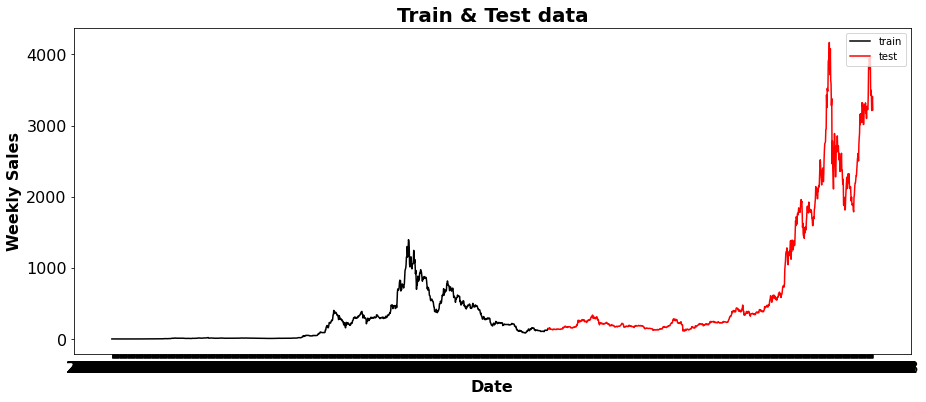

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:1255], y = close_stock['close'][:1255], color = 'black')
sns.lineplot(x = close_stock['date'][1255:], y = close_stock['close'][1255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1516, 15)
y_train:  (1516,)
X_test:  (641, 15)
y_test (641,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

## LASSO

In [ ]:
ls = Lasso()
ls.fit(X_train, y_train)

Lasso()

In [ ]:
pred = ls.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, pred)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, pred))))

Mean Absolute Error - MAE : 0.21428813759942086
Root Mean squared Error - RMSE : 0.3336659969254003


## RIDGE

In [ ]:
rg = Ridge()
rg.fit(X_train, y_train)

Ridge()

In [ ]:
pred = rg.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, pred)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, pred))))

Mean Absolute Error - MAE : 0.021521864186174244
Root Mean squared Error - RMSE : 0.03983542633763412


## LinearRegression

In [ ]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lg.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, pred)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, pred))))

Mean Absolute Error - MAE : 0.011326802383617928
Root Mean squared Error - RMSE : 0.022930090812842103


# ETH

In [ ]:
closedf = usdcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (732, 2)


In [ ]:
closedf=closedf.dropna()

In [ ]:
#closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  670


In [ ]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(670, 1)


In [ ]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (468, 1)
test_data:  (202, 1)


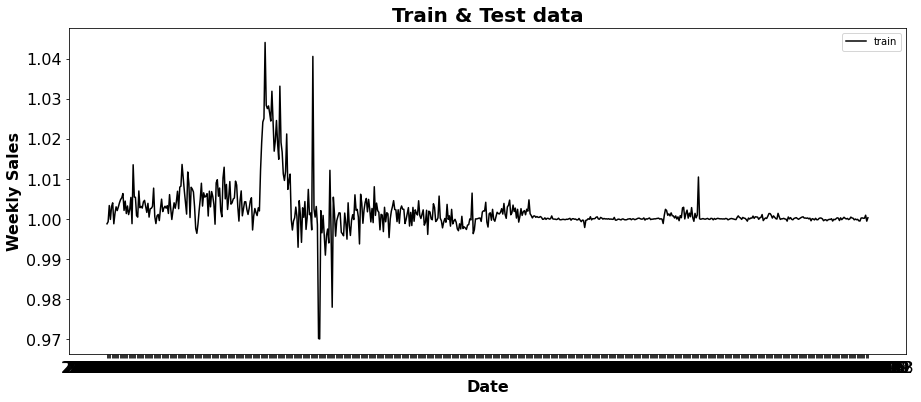

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:1255], y = close_stock['close'][:1255], color = 'black')
sns.lineplot(x = close_stock['date'][1255:], y = close_stock['close'][1255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (452, 15)
y_train:  (452,)
X_test:  (186, 15)
y_test (186,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

## LASSO

In [ ]:
ls = Lasso()
ls.fit(X_train, y_train)

Lasso()

In [ ]:
pred = ls.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, pred)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, pred))))

Mean Absolute Error - MAE : 0.03111594825094074
Root Mean squared Error - RMSE : 0.03248404907842939


## RIDGE

In [ ]:
rg = Ridge()
rg.fit(X_train, y_train)

Ridge()

In [ ]:
pred = rg.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, pred)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, pred))))

Mean Absolute Error - MAE : 0.008871334252354923
Root Mean squared Error - RMSE : 0.014336842668766218


## LinearRegression

In [ ]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lg.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, pred)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, pred))))

Mean Absolute Error - MAE : 0.008330124409387551
Root Mean squared Error - RMSE : 0.014978433607568098
